<a href="https://colab.research.google.com/github/naruto1206/Homework-CNN-AI/blob/main/CNN_11_TIEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
from matplotlib.image import imread

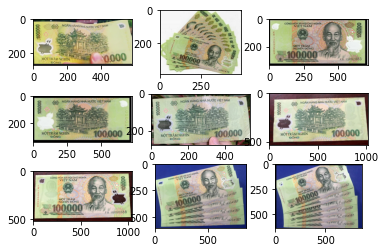

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Colab Notebooks/data-11-tien-giay/train/100k/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'c' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [22]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/data-11-tien-giay/train',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/Colab Notebooks/data-11-tien-giay/validation',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 132 images belonging to 11 classes.
Found 11 images belonging to 11 classes.


In [31]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_12 (Bat  (None, 198, 198, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 97, 97, 64)      

In [28]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# callbacks = [EarlyStopping(monitor="accuracy", patience=0.98),
#  ModelCheckpoint(filepath="",
#  monitor="val_acc",
# save_best_only=True)]

In [32]:
history=model.fit(train_dataset,batch_size=115,epochs=30,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/30
14/14 [==============================] - 15s 1s/step - loss: 2.1628 - accuracy: 0.3636 - val_loss: 2.6050 - val_accuracy: 0.0909
Epoch 2/30
14/14 [==============================] - 14s 971ms/step - loss: 1.1084 - accuracy: 0.6364 - val_loss: 6.4492 - val_accuracy: 0.0909
Epoch 3/30
14/14 [==============================] - 14s 971ms/step - loss: 0.6435 - accuracy: 0.8182 - val_loss: 9.2071 - val_accuracy: 0.0909
Epoch 4/30
14/14 [==============================] - 15s 1s/step - loss: 0.3689 - accuracy: 0.9167 - val_loss: 10.4732 - val_accuracy: 0.0909
Epoch 5/30
14/14 [==============================] - 14s 968ms/step - loss: 0.2848 - accuracy: 0.9394 - val_loss: 10.8329 - val_accuracy: 0.0909
Epoch 6/30
14/14 [==============================] - 14s 965ms/step - loss: 0.2669 - accuracy: 0.9318 - val_loss: 12.4387 - val_accuracy: 0.0909
Epoch 7/30
14/14 [==============================] - 14s 966ms/step - loss: 0.1820 - accuracy: 0.9773 - val_loss: 12.3841 - val_accuracy: 0.0909
E

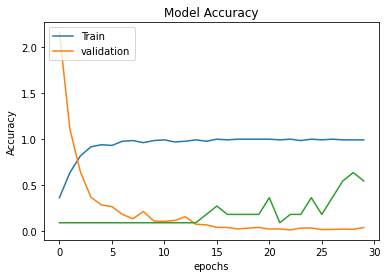

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()


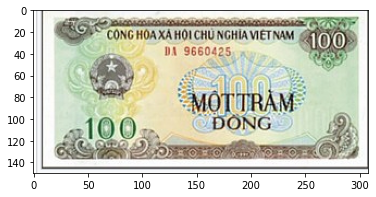

Day la 100


In [39]:
filename = '/content/drive/MyDrive/Colab Notebooks/data-11-tien-giay/validation/100/e0.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la 100')
elif kq ==1:
  print('Day la 100k')
elif kq ==2:
  print('Day la 10k')
elif kq ==3:
  print('Day la 1k')
elif kq ==4:
  print('Day la 200')
elif kq ==5:
  print('Day la 200k')
elif kq ==6:
  print('Day la 2k')
elif kq ==7:
  print('Day la 500')
elif kq ==8:
  print('Day la 500k')
elif kq ==9:
  print('Day la 50k')
elif kq ==10:
  print('Day la 5k')

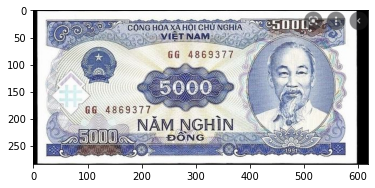

Day la 5k


In [42]:
filename = '/content/drive/MyDrive/Colab Notebooks/data-11-tien-giay/validation/5k/f4.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la 100')
elif kq ==1:
  print('Day la 100k')
elif kq ==2:
  print('Day la 10k')
elif kq ==3:
  print('Day la 1k')
elif kq ==4:
  print('Day la 200')
elif kq ==5:
  print('Day la 200k')
elif kq ==6:
  print('Day la 2k')
elif kq ==7:
  print('Day la 500')
elif kq ==8:
  print('Day la 500k')
elif kq ==9:
  print('Day la 50k')
elif kq ==10:
  print('Day la 5k')

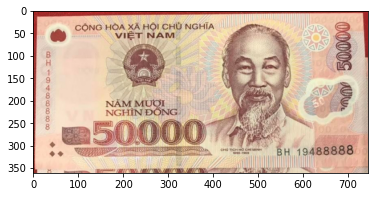

Day la 50k


In [46]:
filename = '/content/drive/MyDrive/Colab Notebooks/data-11-tien-giay/validation/50k/d3.jpg'  

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('Day la 100')
elif kq ==1:
  print('Day la 100k')
elif kq ==2:
  print('Day la 10k')
elif kq ==3:
  print('Day la 1k')
elif kq ==4:
  print('Day la 200')
elif kq ==5:
  print('Day la 200k')
elif kq ==6:
  print('Day la 2k')
elif kq ==7:
  print('Day la 500')
elif kq ==8:
  print('Day la 500k')
elif kq ==9:
  print('Day la 50k')
elif kq ==10:
  print('Day la 5k')

In [47]:
model.save('banking_rec_30epochs.h5')